# Regression

Simple Linear Regression

Multiple Linear Regression

Polynomial Regression

### Support Vector for Regression (SVR)

Decision Tree Regression

Random Forest Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# import the dataset
df = pd.read_csv("Position_Salaries.csv")
x = df.iloc[:, 1:-1].values # taking in all the values.take in all the columns excluding the last column in x
y = df.iloc[:, -1].values # take in the last column in y

In [13]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [14]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [15]:
df.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [16]:
print(x[1])

[2]


In [17]:
print(x[1], y[1])

[2] 50000


In [18]:
# Maximing the maximum data, so not splitting the dataset. 

In [47]:
# reshape y
reshape = y.reshape(len(y), 1)

In [48]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [49]:
# Apply the feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()# no arguments needed
sc_y = StandardScaler()
x = sc_x.fit_transform(x) 
y = sc_y.fit_transform(y) 

In [50]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


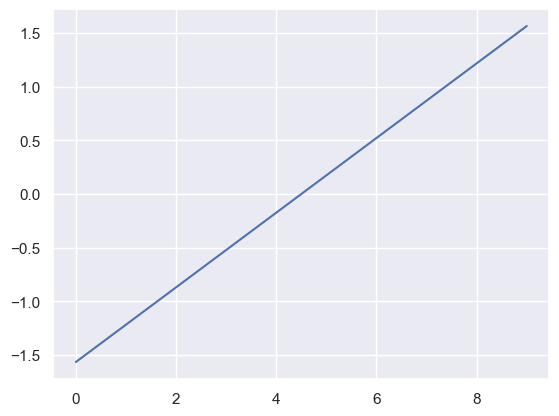

In [51]:
plt.plot(x)

In [52]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


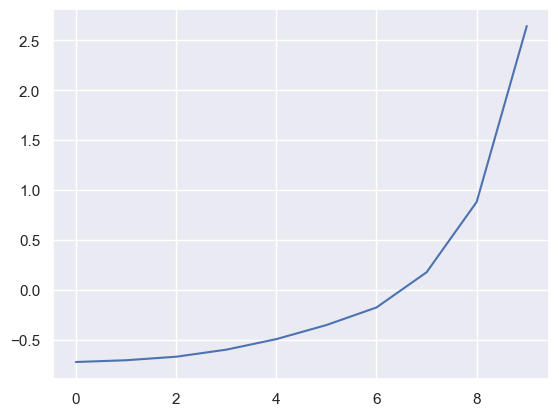

In [53]:
plt.plot(y)

In [54]:
# Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y) # train the SVR module using fit

C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [55]:
# predict a new result
predicted_salary = sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(1, -1))


In [56]:
print(predicted_salary)

[[0.01150915]]


In [57]:
# Visualise the SVR Results
print("Shape of x:", x.shape)
print("Shape of predictions:", regressor.predict(x.reshape(-1, 1)).shape)



Shape of x: (10, 1)
Shape of predictions: (10,)


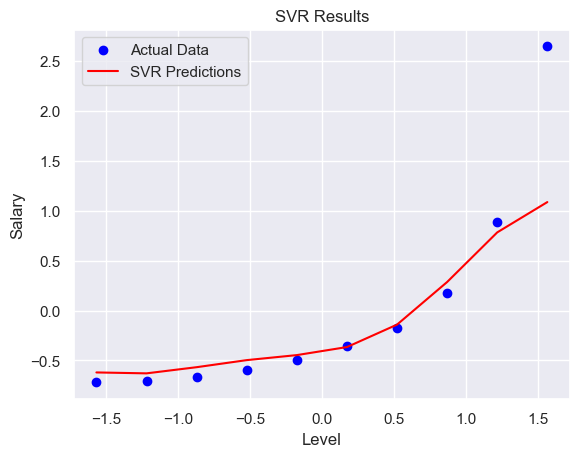

In [58]:
# Transform the data and predictions
x_transformed = sc_x.inverse_transform(x)
predictions = regressor.predict(x).reshape(-1, 1)
predictions_transformed = sc_y.inverse_transform(predictions)

# Visualise the SVR Results
plt.scatter(x_transformed, sc_y.inverse_transform(y), color='blue', label='Actual Data')
plt.plot(x_transformed, predictions_transformed, color='red', label='SVR Predictions')
plt.title('SVR Results')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()




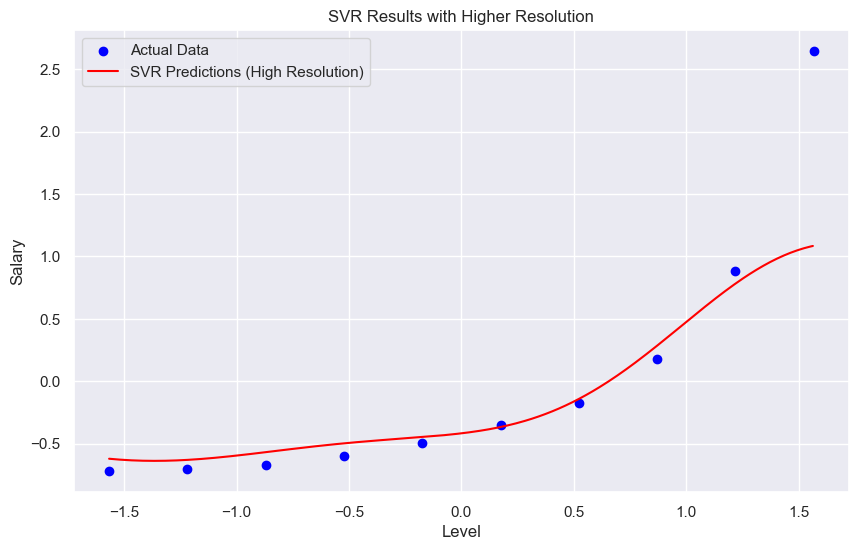

In [59]:
sns.set_theme(style = 'darkgrid')

# Generate a denser set of points for visualisation
x_grid = np.arange(min(x), max(x), 0.01)[:, np.newaxis]

# Transform the grid points
x_grid_transformed = sc_x.inverse_transform(x_grid)

# Predict salaries for the grid points
predictions_grid = regressor.predict(x_grid)

# Inverse transform the predictions
predictions_grid_transformed = sc_y.inverse_transform(predictions_grid.reshape(-1, 1))

# Visualize the SVR Results with higher resolution
plt.figure(figsize=(10, 6))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='blue', label='Actual Data')
plt.plot(x_grid_transformed, predictions_grid_transformed, color='red', label='SVR Predictions (High Resolution)')
plt.title('SVR Results with Higher Resolution')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()
